## 1.Introduction

Welcome to this notebook, which focuses on analyzing the tradeoff associated with investing in mutual funds while considering environmental, social, and governance (ESG) factors in the investment decision-making process. 

The objective of this project is to provide insights and guidance for making more informed investment choices by incorporating ESG considerations.

Throughout this notebook, we will leverage Python's powerful data manipulation and visualization libraries, such as pandas, matplotlib, numpy, and seaborn, to analyze and visualize the US Mutual Funds dataset.

Let's begin the exploration of mutual fund performance and its relationship with ESG risk factors!
### Notebook Content

* 1. Introduction
* 2. Basic Setup
* 3. MF ESG risk level and Financial Performance trends 
     * 3.1 ESG Risk Classification
     * 3.2 ESG Risk and Return 
     * 3.3 ESG Risk and Alpha
     * 3.4 ESG Risk and Beta 
     * 3.5 ESG Risk and Sharpe Ratio
* 4. Findings Summary    



## 2.Basic Setup 

### 2.1 Libraries Importation

To ensure the dataset can be effectively used, it is crucial to import the necessary library. By importing the required library, we gain access to specific functions and capabilities that enable us to load, manipulate, and analyze the dataset effectively. 

In [1]:
# Import all necessary libraries  
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for creating plots and visualizations 
import numpy as np # used for numerical computing. It provides efficient arrays and mathematical functions for working with large datasets
import seaborn as sns # is built on top of matplotlib, used for high-level data visualization 
import warnings 
#import xarray as xr # used for working with labeled multi-dimensional arrays


### 2.2 openpyxl library Installation
Installing the openpyxl library is essential for working with datasets in Excel file format. This library offers functionality for reading and writing Excel files, allowing for seamless integration with Python. To install the openpyxl library, we executed the following command in **the terminal**:

conda install openpyxl

In [2]:
#conda install openpyxl # a command that you can run in your terminal to install the openpyxl library, which is used for reading and writing Excel files

### 2.3 Loading the Dataset

In [3]:
df_mutual_funds= pd.read_csv('~/dataset-yahoo-finance-ETF-MF/MutualFunds.csv', header=0)

### 2.4 Exploring the Dataset

In [4]:
df_mutual_funds.info()# displays concise information about the DataFrame (number of rows, columns, and data types of each column)
df_mutual_funds.head() # displays the first few rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 54.1+ MB


,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The following code snippet calculates the count of non-null entries for each column in the df_mutual_funds DataFrame. It then determines the data types of each column and combines the non-null counts and data types into a new DataFrame called column_info.Given the large dataset at hand, utilizing this method offers a convenient approach to gain a comprehensive overview.

In [5]:
# Count of non-null entries for each column
non_null_counts = df_mutual_funds.count()

# Data types of each column
data_types = df_mutual_funds.dtypes

# Combine non-null counts and data types into a new DataFrame
column_info = pd.DataFrame({'Non-Null Counts': non_null_counts, 'Data Types': data_types})

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the column info
#column_info


In [6]:
# Creating a new dataset with selected columns
df_line_graph= df_mutual_funds[['fund_symbol','fund_long_name','size_type','investment_type', 'fund_return_2000','fund_return_2001','fund_return_2002','fund_return_2003','fund_return_2004','fund_return_2005','fund_return_2006','fund_return_2007','fund_return_2008','fund_return_2009','fund_return_2010','fund_return_2011','fund_return_2012','fund_return_2013','fund_return_2014','fund_return_2015','fund_return_2015','fund_return_2016','fund_return_2017','fund_return_2018','fund_return_2019','fund_return_2020','esg_score','environment_score','social_score','governance_score','morningstar_risk_rating']]

## 3.MF ESG risk level and Financial Performance trends 
   ### 3.1 ESG Risk Classification

In [7]:
def classify_esg_score(esg_score):
    if esg_score <= 20:
        return  'Low'
    elif esg_score <= 30:
        return 'Medium'
    elif esg_score > 30:
        return 'High'
     

# Assuming 'risk' column contains the risk values for each mutual fund
df_mutual_funds['esg_risk_level'] = df_mutual_funds['esg_score'].apply(classify_esg_score)

### 3.2 ESG risk and Return 

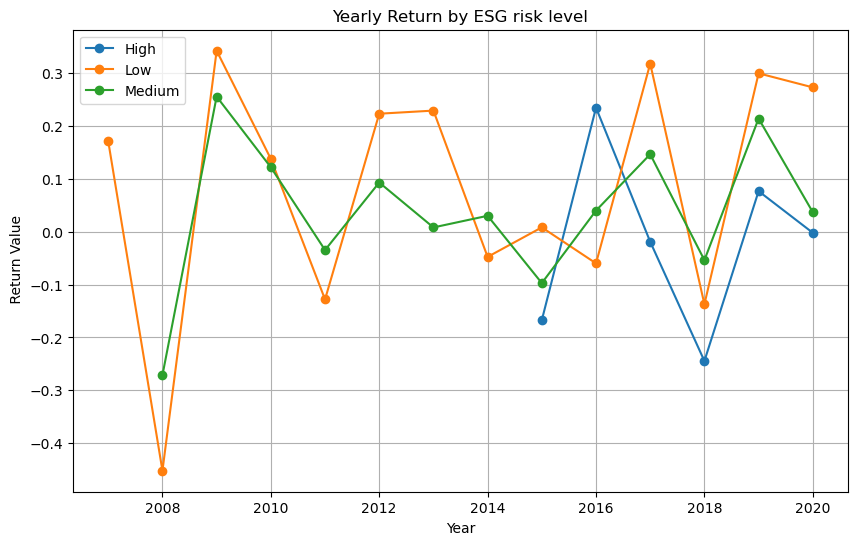

In [8]:
# Group the data by Size
grouped_data = df_mutual_funds.groupby('esg_risk_level')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 100
    if len(group) > 20000:
        group = group.head(20000)
    years = []
    returns = []
    for col in group.columns:
         if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel(' Return Value')
plt.title('Yearly Return by ESG risk level')
plt.legend()
plt.grid(True)

plt.show()

### 3.3 ESG risk and Alpha (Outperformance : the higher , the better )

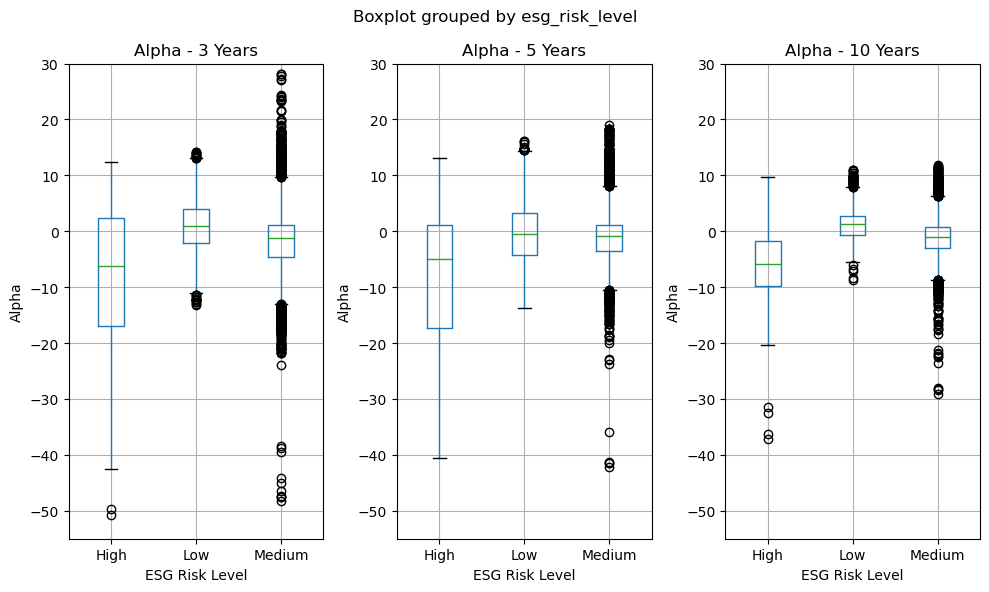

In [9]:

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_alpha_3years
df_mutual_funds.boxplot(column='fund_alpha_3years', by='esg_risk_level', ax=axs[0])
axs[0].set_title('Alpha - 3 Years')
axs[0].set_xlabel('ESG Risk Level')
axs[0].set_ylabel('Alpha')
axs[0].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_5years
df_mutual_funds.boxplot(column='fund_alpha_5years', by='esg_risk_level', ax=axs[1])
axs[1].set_title('Alpha - 5 Years')
axs[1].set_xlabel('ESG Risk Level')
axs[1].set_ylabel('Alpha')
axs[1].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot

# Box plot for fund_alpha_10years
df_mutual_funds.boxplot(column='fund_alpha_10years', by='esg_risk_level', ax=axs[2])
axs[2].set_title('Alpha - 10 Years')
axs[2].set_xlabel('ESG Risk Level')
axs[2].set_ylabel('Alpha')
axs[2].set_ylim(-55, 30)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()


### 3.4 ESG risk and Beta (Market Risk : the lower , the better)

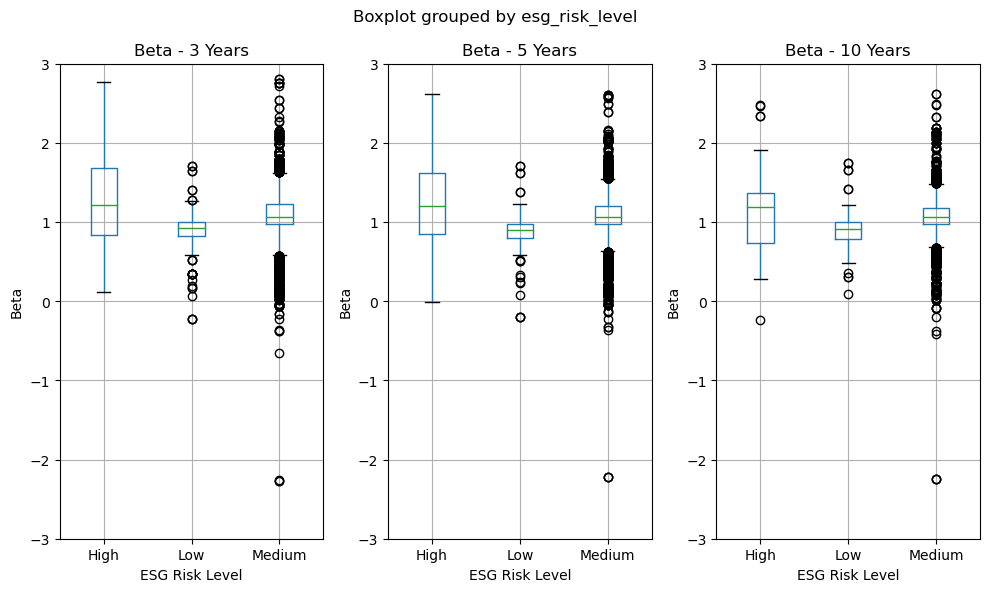

In [10]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_beta_3years', by='esg_risk_level', ax=axs[0])
axs[0].set_title('Beta - 3 Years')
axs[0].set_xlabel('ESG Risk Level')
axs[0].set_ylabel('Beta')
axs[0].set_ylim(-3, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_beta_5years', by='esg_risk_level', ax=axs[1])
axs[1].set_title('Beta - 5 Years')
axs[1].set_xlabel('ESG Risk Level')
axs[1].set_ylabel('Beta')
axs[1].set_ylim(-3, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_beta_10years', by='esg_risk_level', ax=axs[2])
axs[2].set_title('Beta - 10 Years')
axs[2].set_xlabel('ESG Risk Level')
axs[2].set_ylabel('Beta')
axs[2].set_ylim(-3, 3)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

### 3.5 ESG risk Sharpe Ratio (Benchmark : the higher , the better)

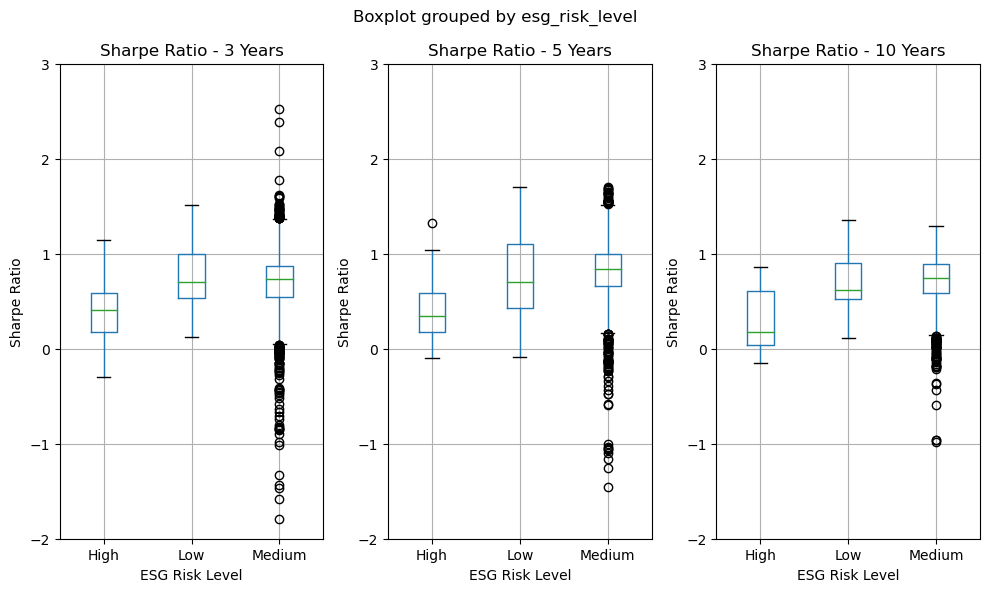

In [12]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Box plot for fund_beta_3years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_3years', by='esg_risk_level', ax=axs[0])
axs[0].set_title('Sharpe Ratio - 3 Years')
axs[0].set_xlabel('ESG Risk Level')
axs[0].set_ylabel('Sharpe Ratio')
axs[0].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_5years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_5years', by='esg_risk_level', ax=axs[1])
axs[1].set_title('Sharpe Ratio - 5 Years')
axs[1].set_xlabel('ESG Risk Level')
axs[1].set_ylabel('Sharpe Ratio')
axs[1].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot

# Box plot for fund_beta_10years
df_mutual_funds.boxplot(column='fund_sharpe_ratio_10years', by='esg_risk_level', ax=axs[2])
axs[2].set_title('Sharpe Ratio - 10 Years')
axs[2].set_xlabel('ESG Risk Level')
axs[2].set_ylabel('Sharpe Ratio')
axs[2].set_ylim(-2, 3)  # Set the y-axis limit for the first subplot


# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

## 4.Findings Summary 